In [119]:
%matplotlib inline

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier # good for incremental learning
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs

# Clustering (cluster/"clumps" discovery)

## **Misc notes**

SHAP (Shapley additive explanations)

Incremental learning  
- for big data sets for training in "chunks"
- for additional training to an already trained model

Transfer learning (in neural networks)

Huber loss function - for regression with outliers - https://medium.com/@dishant.salunke9/huber-loss-0cb10b74ed05  
Modified Huber loss - for classification with outliers

Log Loss - https://medium.com/@TheDataScience-ProF/understanding-log-loss-a-comprehensive-guide-with-code-examples-c79cf5411426

Perceptron - https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/

Learning curve (model)

AUTOMATED FEATURE ENGINEERING

AutoML - Automated Hyperparameter tuning
- HyperOpt
- Optuna

Extreme bounds analysis

Parameter-Efficient Fine-Tuning (PEFT) - https://medium.com/@techsachin/parameter-efficient-fine-tuning-for-models-categories-and-algorithms-4481fb2bdef0

## **Presentation notes**

Topic modeling - In natural language processing (NLP), topic modeling is a text mining technique that applies unsupervised learning on large sets of texts to produce a summary set of terms derived from those documents that represent the collection’s overall primary set of topics.  
https://www.ibm.com/topics/topic-modeling

Linear Discriminant Analysis (LDA) - https://www.ibm.com/topics/linear-discriminant-analysis

NetworkX (python)

Label propagation

Silhouette analysis - https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

Hierarchical clustering, aka "divisive" (top-down approach)  
Agglomerative clustering, used in sklearn (bottom-up approach)

Linkage - https://scikit-learn.org/1.5/auto_examples/cluster/plot_linkage_comparison.html

DBSCAN - Density-based spatial clustering of applications with noise

EC3: Combining Clustering and Classification for Ensemble Learning - https://arxiv.org/abs/1708.08591

## Initial Demo

In [11]:
sgd = SGDClassifier()

In [12]:
for chunk in pd.read_csv("../5-Support-Vector-Machines/data/pulsar_stars.csv", chunksize = 1000):
    X, y = chunk.drop(columns = ["target_class"]), chunk["target_class"]
    print(X.shape)

    sgd.partial_fit(X, y, classes = y.unique())

(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(898, 8)


In [13]:
sgd

SGDClassifier()

In [14]:
sgd.coef_

array([[-186.33910144,  276.18188766,  182.38860064,  614.86973146,
         -42.16795408,  157.68726014,  226.64563811, -135.08139968]])

## Clustering Demo

In [42]:
attributes, clusters = make_blobs(n_samples = 5000, random_state = 30)

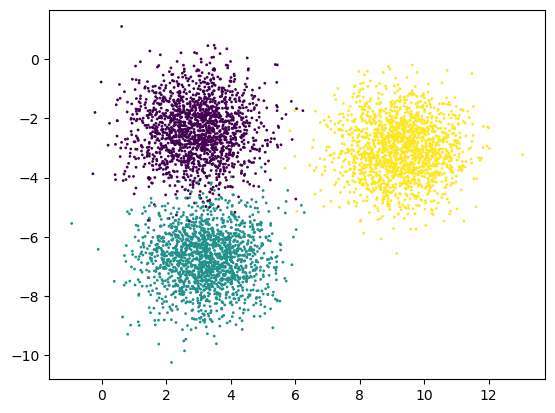

In [47]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters, s = 1)
plt.show()

In [55]:
attributes_train, attributes_test, clusters_train, clusters_test = train_test_split(
    attributes, clusters, test_size = 0.1, stratify = clusters
)

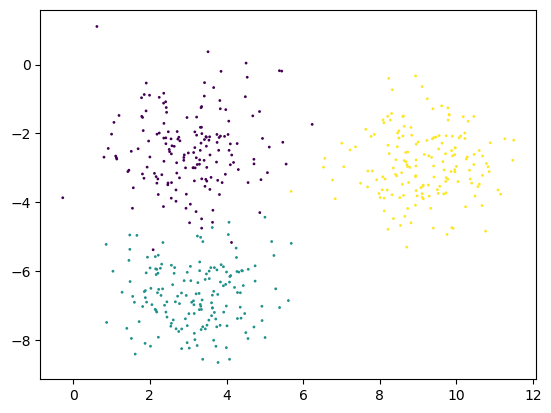

In [57]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c = clusters_test, s = 1)
plt.show()

In [60]:
k_means = KMeans(n_clusters = 3, init = "random")

In [61]:
k_means.fit(attributes_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [63]:
train_predictions = k_means.predict(attributes_train)

In [70]:
test_predictions = k_means.predict(attributes_test)

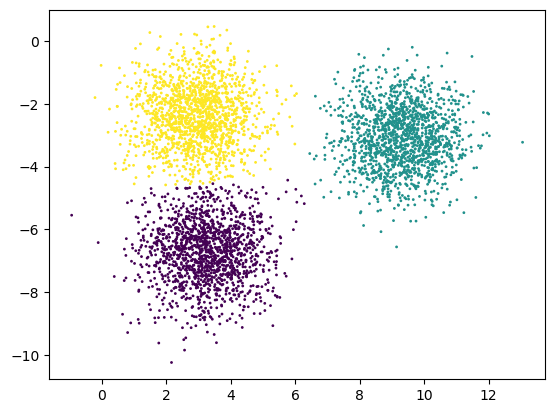

In [67]:
plt.scatter(attributes_train[:, 0], attributes_train[:, 1], c = train_predictions, s = 1)

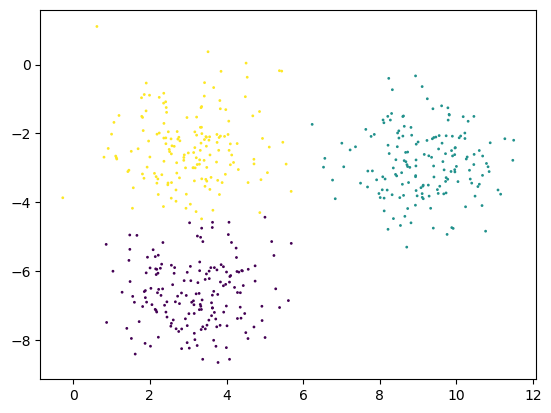

In [71]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c = test_predictions, s = 1)

In [103]:
attributes2, clusters2 = make_blobs(n_samples = 500, random_state = 38, cluster_std = 3)

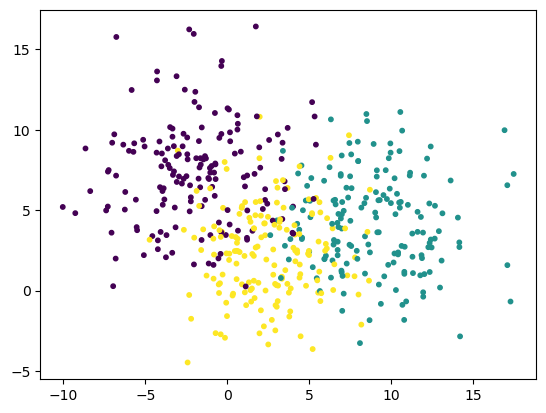

In [104]:
plt.scatter(attributes2[:, 0], attributes2[:, 1], c = clusters2, s = 10)
plt.show()

In [105]:
k_means.fit(attributes2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [106]:
new_predict = k_means.predict(attributes2)

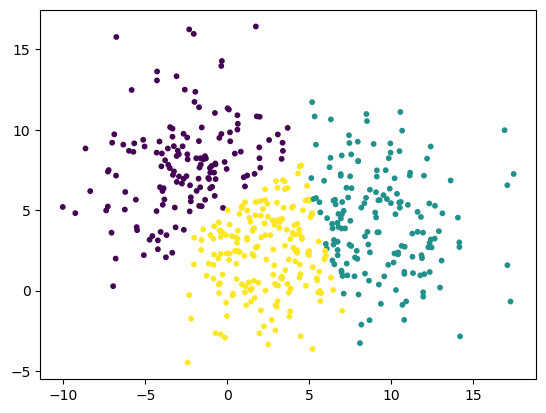

In [107]:
plt.scatter(attributes2[:, 0], attributes2[:, 1], c = new_predict, s = 10)

In [108]:
attributes_skewed = attributes @ np.array([
    [1, 0.5],
    [0.2, 1]
])

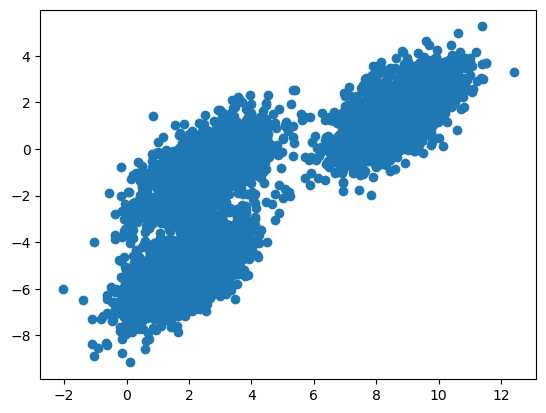

In [109]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1])

In [110]:
k_means.fit(attributes_skewed)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

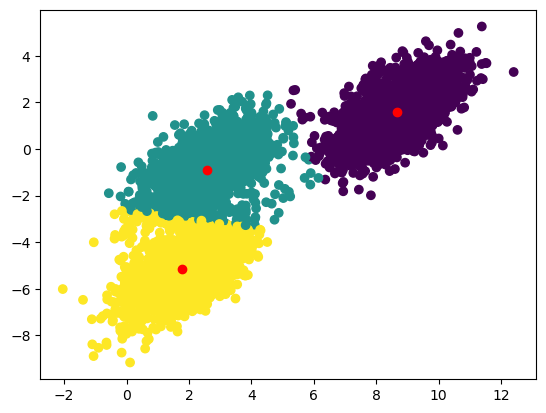

In [113]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c = k_means.predict(attributes_skewed))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = "r")
plt.show()

In [122]:
data = {
    "n_clusters": [],
    "inertias": []
}

for n_clusters in range(1, 11):
    k_means = KMeans(n_init = "auto", n_clusters = n_clusters)
    k_means.fit(attributes)
    data["n_clusters"].append(n_clusters)
    data["inertias"].append(k_means.inertia_)

In [133]:
df = pd.DataFrame(data)

In [134]:
data

{'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'inertias': [70699.96144787977,
  25648.47056159051,
  9691.786150024389,
  8621.086821511235,
  7534.1862312541325,
  6741.32046101873,
  5740.172419191529,
  5522.679513681852,
  4764.693622509981,
  4058.648740277358]}

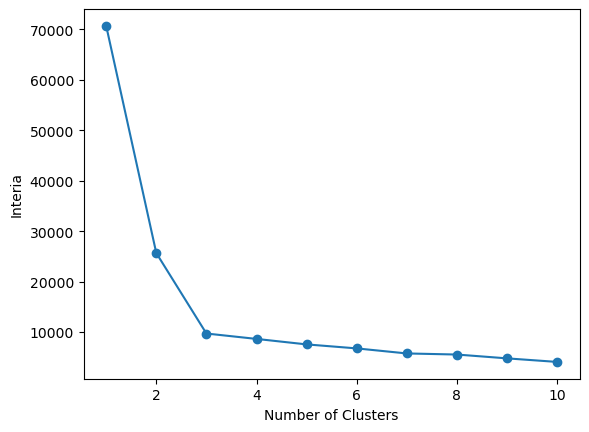

In [135]:
plt.scatter(data["n_clusters"], data["inertias"])
plt.plot(data["n_clusters"], data["inertias"])
plt.xlabel("Number of Clusters")
plt.ylabel("Interia")
plt.show()

In [137]:
-df.inertias.diff()

0             NaN
1    45051.490886
2    15956.684412
3     1070.699329
4     1086.900590
5      792.865770
6     1001.148042
7      217.492906
8      757.985891
9      706.044882
Name: inertias, dtype: float64

In [139]:
agglomerative = AgglomerativeClustering(n_clusters = 3)